In [1]:
# !pip uninstall scikit-learn # if you are using pip
# !pip install scikit-learn==1.1.3 # if you are using pip

Tableau Story for this analysis with all the key insights can be found at the link
https://public.tableau.com/shared/NBWRHKZ33?:display_count=n&:origin=viz_share_link


# Import Libraries

In [2]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization

# Data Loading and Preparation

## Load Dataset and check dimensions

In [3]:
#Read the dataset
data_df = pd.read_csv("Telco_customer_churn.csv")

print('Number of rows: ', data_df.shape[0], " Number of colums:", data_df.shape[1])


Number of rows:  7043  Number of colums: 33


In [4]:
data_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Check and convert to suitable data types

In [5]:
#checking if data types are correct
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data_df['Total Charges'] = pd.to_numeric(data_df['Total Charges'],errors='coerce')

> **Opinion:**

> - Total Charges should be of numeric type (for latter arithmetic calculations if necessary).

## Handling Missing Values

In [7]:

missing_column_count = data_df.isnull().sum()

print("Number of missing values in each column:")
print(missing_column_count)

# Check the row-wise missing value frequency
rowwise_missing_frequency = data_df.apply(lambda x: x.isnull().sum(), axis=1)

print("\nRow-wise missing value frequency:")
print(rowwise_missing_frequency)

#Imputing Total Charges by median
data_df['Total Charges'] = data_df['Total Charges'].fillna(data_df['Total Charges'].median())

#Replacing Nan in Churn Reason with Unknown
data_df['Churn Reason'] = data_df['Churn Reason'].fillna('Unknown')

Number of missing values in each column:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Row-wise missing value frequency:
0       0
1       0
2       0
3       0
4       0
   

> Based on the column and row frequency: Given the low number of missing values isolated in the Total Charges column.
> I elect that any missing values should be filled by the median.

> However, more than half of the Churn Reason column is missing. Imputing could cause significant bias. However, deleting would lose out key information.
> I could  either:
> - Delete the column
> - Fill the missing with a string, and Take a pinch of salt with my analysis

> Im  going with filling missing with the string "Unknown"

In [8]:
data_df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

In [9]:
data_df.to_csv("cleaned_Telecom_churn.csv")

## Analyzing Target Class Imbalance and Distribution


Text(0.5, 1.0, 'Distribution of Churn')

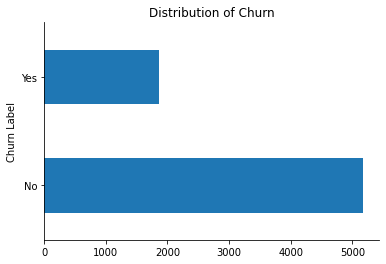

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
data_df.groupby('Churn Label').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Churn")

In [11]:
target_instance = data_df["Churn Label"].value_counts().to_frame()
print(target_instance)

             count
Churn Label       
No            5174
Yes           1869


> Imbalance in Dataset - approx 75% No Churn, 25% Churn

> Given this is binary analysis, while easier to model, balance is important.

> - Consider specific performance metrics like precision, confusion matrices - avoids biased decisions caused by imbalance.

> - Consider generating synthetic samples in our train test split using methods like SMOTE.

In [12]:
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})

## Analyzing Dataset Features vs Churn

    
> From my perspective on the data we can generalize the features into sub-categories like: Customer Demographics, Customer Opt-in Services, Customer Payment Features

> - Demographic customer information

>     Features: gender , SeniorCitizen , Partner , Dependents, Country, State ... (location related)

> - Services that each customer has opted-in for

>     Features: PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,
    
> - Customer account information

>     Features: tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

In [13]:
def generate_grouped_charts(data_df, column_list, super_title):
    num_columns = len(column_list)
    num_rows = num_columns // 2 + num_columns % 2  # Calculate the number of rows needed

    # Adjust figsize and subplots_adjust parameters dynamically based on the number of columns
    figsize_width = 12
    figsize_height = 4 * num_rows
    if num_columns > 2:
        figsize_width += (num_columns - 2)  # Increase width for each additional column

    fig, axs = plt.subplots(num_rows, 2, figsize=(figsize_width, figsize_height))
    axs = axs.flatten()

    plt.suptitle(super_title, fontsize=16, y=1.02)

    for i, column in enumerate(column_list):
        row = i // 2
        col = i % 2

        if i < num_columns:  # Skip creating blank plots for odd number of columns
            ax = axs[i]
            ax = data_df.groupby([column, 'Churn Label'])['Churn Label'].count().unstack().plot(
                kind="bar" if row % 2 == 0 else "barh",
                color=['#3498db', '#e74c3c'],
                figsize=(figsize_width, figsize_height),
                ax=ax
            )
            # ax = px.bar(data_df.groupby([column, 'Churn'])['Churn'].count().unstack().reset_index(), x=column, y='Count', color='Churn', title=f'Churn rate by {column}', barmode="group", color_discrete_sequence=["blue", "red"])


            ax.set_title(f'Churn Count by {column}')
            ax.set_xlabel('Count')
            ax.set_ylabel(column)

            if row % 2 == 0:
                ax.legend(title='Churn', labels=['No Churn', 'Churn'], loc='upper right')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top parameter to increase the space at the top



### Customer Demographic Analysis

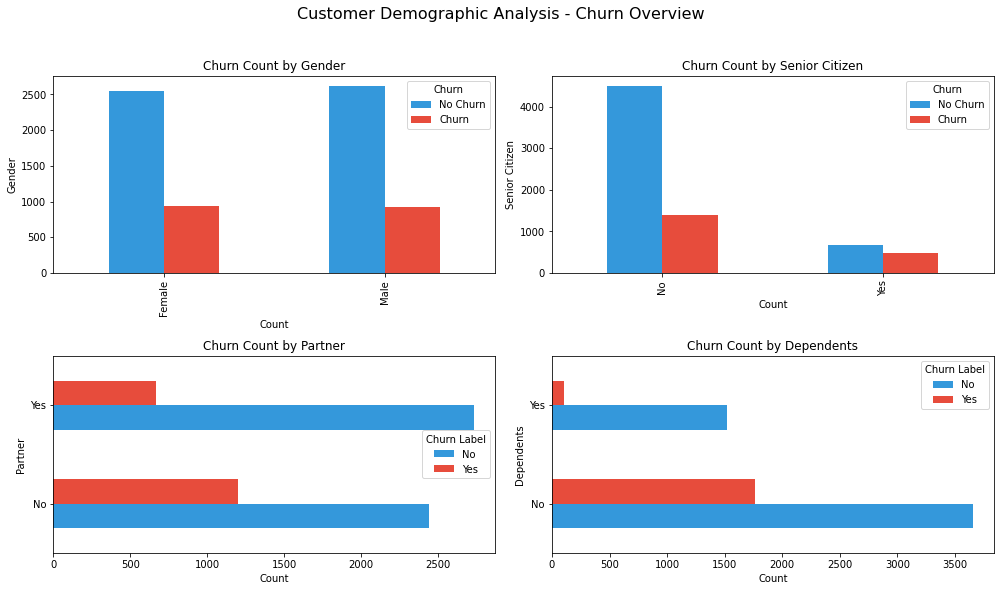

In [14]:
# Analyzing Customer Demographics

column_list = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
super_title = 'Customer Demographic Analysis - Churn Overview'
generate_grouped_charts(data_df, column_list, super_title)
plt.show()

> Findings:

```
> - Distribution by Gender and Partner is similar. This shows that there is an equal split of samples across each class.
> - There seems to be higher churn when customers are NOT Senior Citizens

```


### Customer Location Related Counts

Text(0.5, 1.0, 'Distribution of Country')

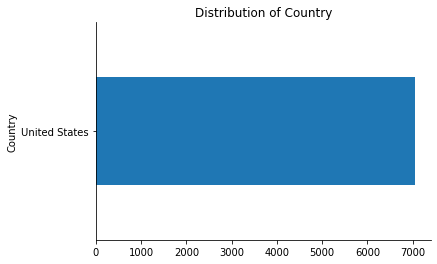

In [15]:
data_df.groupby('Country').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of Country")

Text(0.5, 1.0, 'Distribution of State')

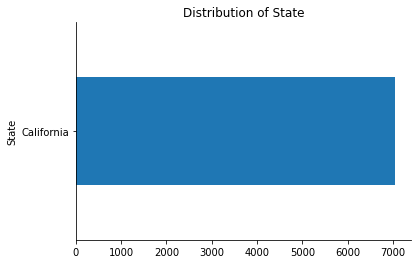

In [16]:
data_df.groupby('State').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Distribution of State")

In [17]:
data_df["City"].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

In [18]:
data_df["Zip Code"].value_counts()

Zip Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64

> Findings:

```
- Entire dataset is located in the United States and the State of California
- There are 1,129 unique cities covered over 1,652 unique zip codes

```


### Customer Opt-in Services Analysis

Click to Zoom in


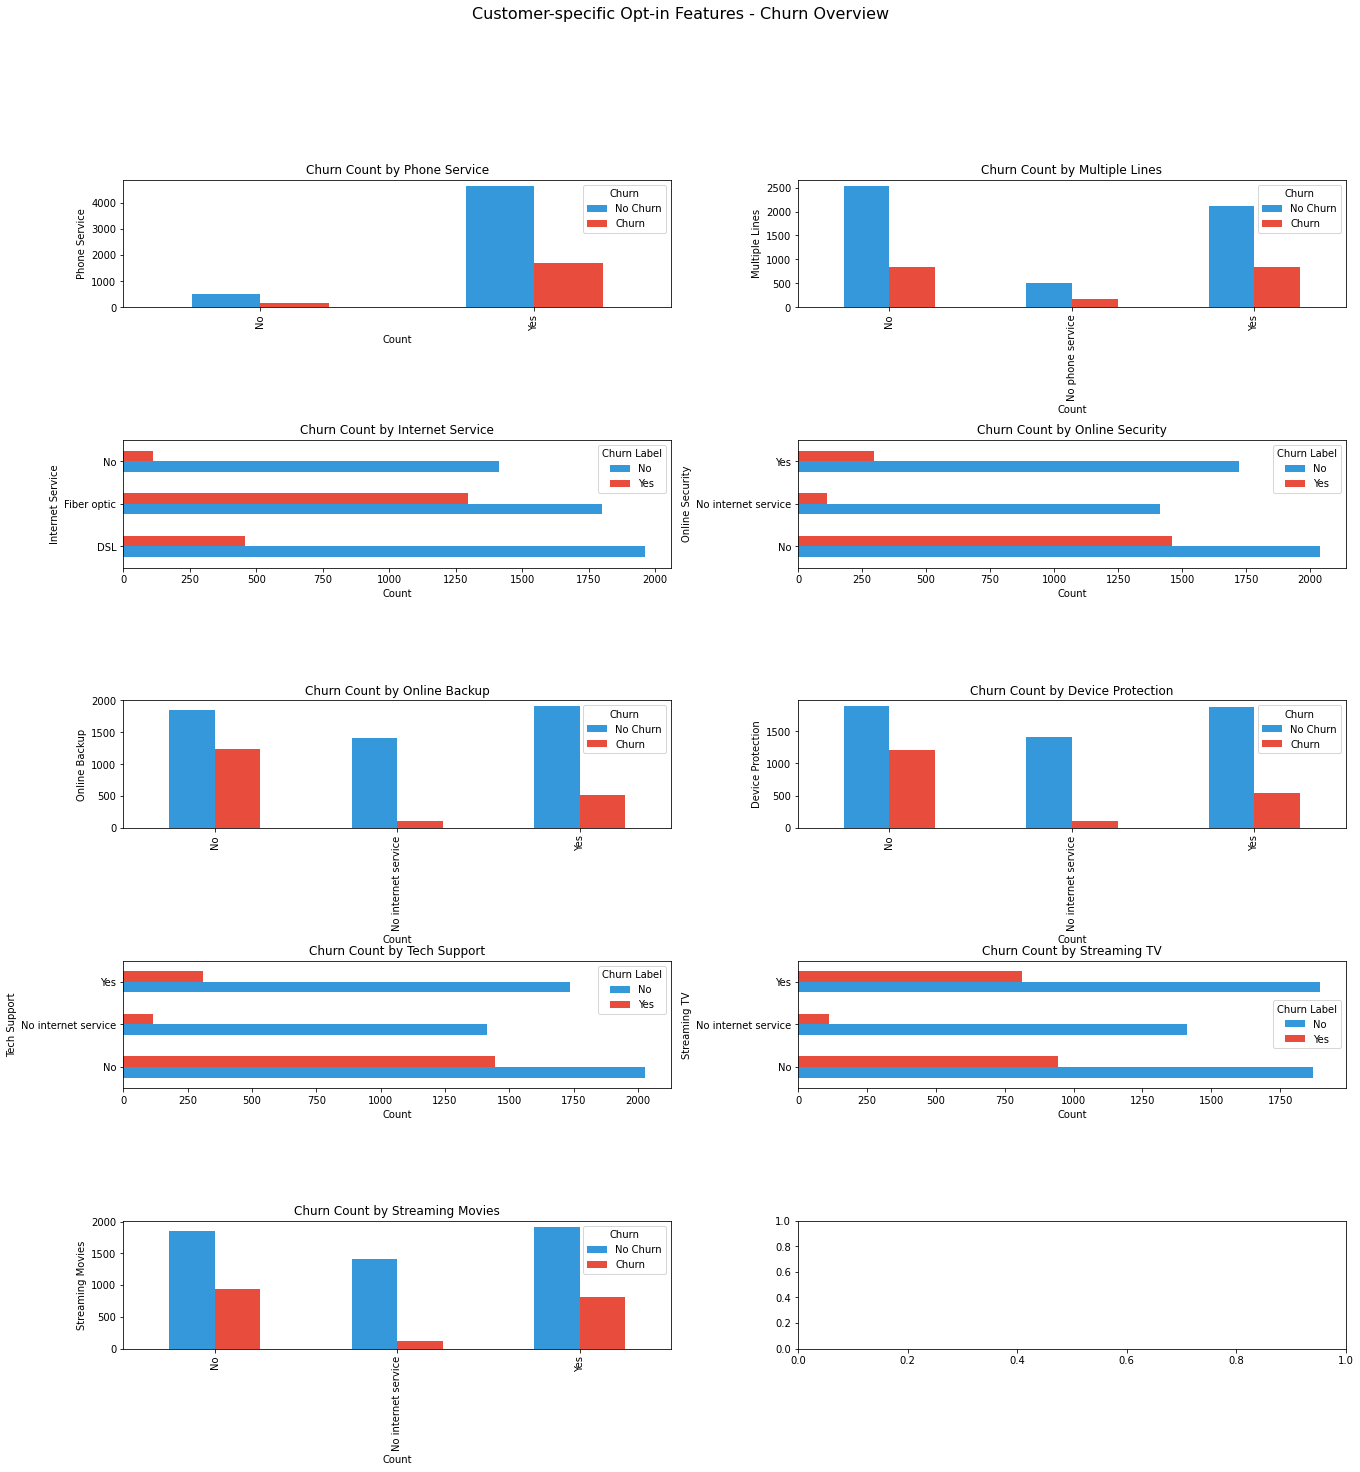

In [19]:
# Analyzing Customer-specific Opt-in Features
column_list = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
super_title = 'Customer-specific Opt-in Features - Churn Overview'
generate_grouped_charts(data_df, column_list, super_title)
print("Click to Zoom in")
plt.show()

> Findings:

> To understand whether a particular feature is descriptive of Churn or not, identify if the distribution of the different values on the x-axis are similar or not. Similar distributions across the x-axis categories generally mean that the feature is not very good at identifying the difference between churn and no churn.

> Churn-descriptive Features (Distributions have a significant difference in "Yes" Churn):
```
- Customer having a Phone service
- Customer having Fibre Optic (could be due to high price, difficulty to maintain)
- Customer without Online Security and Tech support has a higher chance to churn
- Customer
```

> Not very Churn-Descriptive Features:
```
- Customer has Multiple Lines or not (Needs to have a phone service, however)
- Customer with Device protection and Online Backup have a difference, but it is not very
significant enough to make a strong decision.
```

### Customer Payment Features Analysis

Click to Zoom in


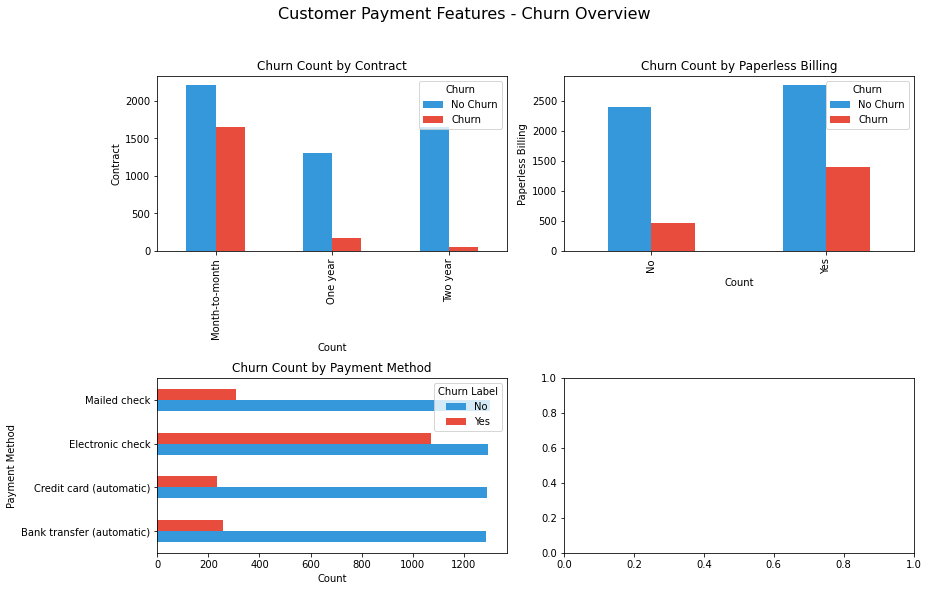

In [20]:
# Analyzing Customer Payment Features
column_list = ['Contract', 'Paperless Billing', 'Payment Method']
super_title = 'Customer Payment Features - Churn Overview'
generate_grouped_charts(data_df, column_list, super_title)
print("Click to Zoom in")
plt.show()

> Findings:

> Churn-descriptive Features (Distributions have a significant difference in "Yes" Churn):
```
- Customer having a month-to-month contract (usually an early sign of churn)
- Customer having Paperless billing (suprising, despite the incentives)
- Customer paying by Electronic Check (maybe given the charges caused by fees)
```

## Visualizing data distributions

In [21]:
# Defining the histogram plotting function
def hist(feature, df):
    group_df = df.groupby([feature, 'Churn Label']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn Label', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [22]:
# Analyzing Charge and Tenure Distributions`
column_list = ['Tenure Months', 'Monthly Charges', 'Total Charges']
print('Customer Charge and Tenure Distributions- Churn Overview')
for column in column_list:
  hist(column, data_df)
print("Click to Zoom in")

Customer Charge and Tenure Distributions- Churn Overview


Click to Zoom in


> Findings:

> Depending on the skew of the distribution we can identify if a particular feature's value has cause more history of Churn or not
```
- Tenure - Right Skew, customers are more likely to churn in the beginning months
- Monthly Charges - Comparatively lesser Right skew, more the charge, more likely to churn
- Total Charges - Right Skew (surprising), lower total charges cause customers to skew
(could be those customers wrapping up or beginning services with no opt-ins, add-ons)
```

# Data Preprocessing

## Domain-specific Manual Feature Selection

In [23]:
data_df.drop(["CustomerID"],axis=1,inplace = True)
data_df.drop(["Country"],axis=1,inplace = True)
data_df.drop(["State"],axis=1,inplace = True)
data_df.drop(["City"],axis=1,inplace = True)
data_df.drop(["Lat Long"],axis=1,inplace = True)
data_df.drop(["Latitude"],axis=1,inplace = True)
data_df.drop(["Longitude"],axis=1,inplace = True)

#Perfect Separators
data_df.drop(["Churn Value"],axis=1,inplace = True)
data_df.drop(["Churn Score"],axis=1,inplace = True)
data_df.drop(["Churn Reason"],axis=1,inplace = True)

> - While the customerID column is useful as a primary key for customers, it does not have any significant meaning, and hence should be removed from the modelling process.

> - Dropping country and state as there is only one unique value

> - Dropping City, to focus on Zip Code as our location metric

> - Dropping Lat Long, Latitude and Longitude as they are highly continuous data like customerID that do not contribute any more than just having zipcode for our analysis.

> - Dropping Churn related values to avoid perfect separation

##  Encoding Categorical Features

In [24]:
# Encode categorical features
data_df['Gender'] = data_df['Gender'].map({'Male':1, 'Female':0})

#function just for binary categories
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

binary_list = ['Churn Label', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
data_df[binary_list] = data_df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)


# Correlation based Feature selection

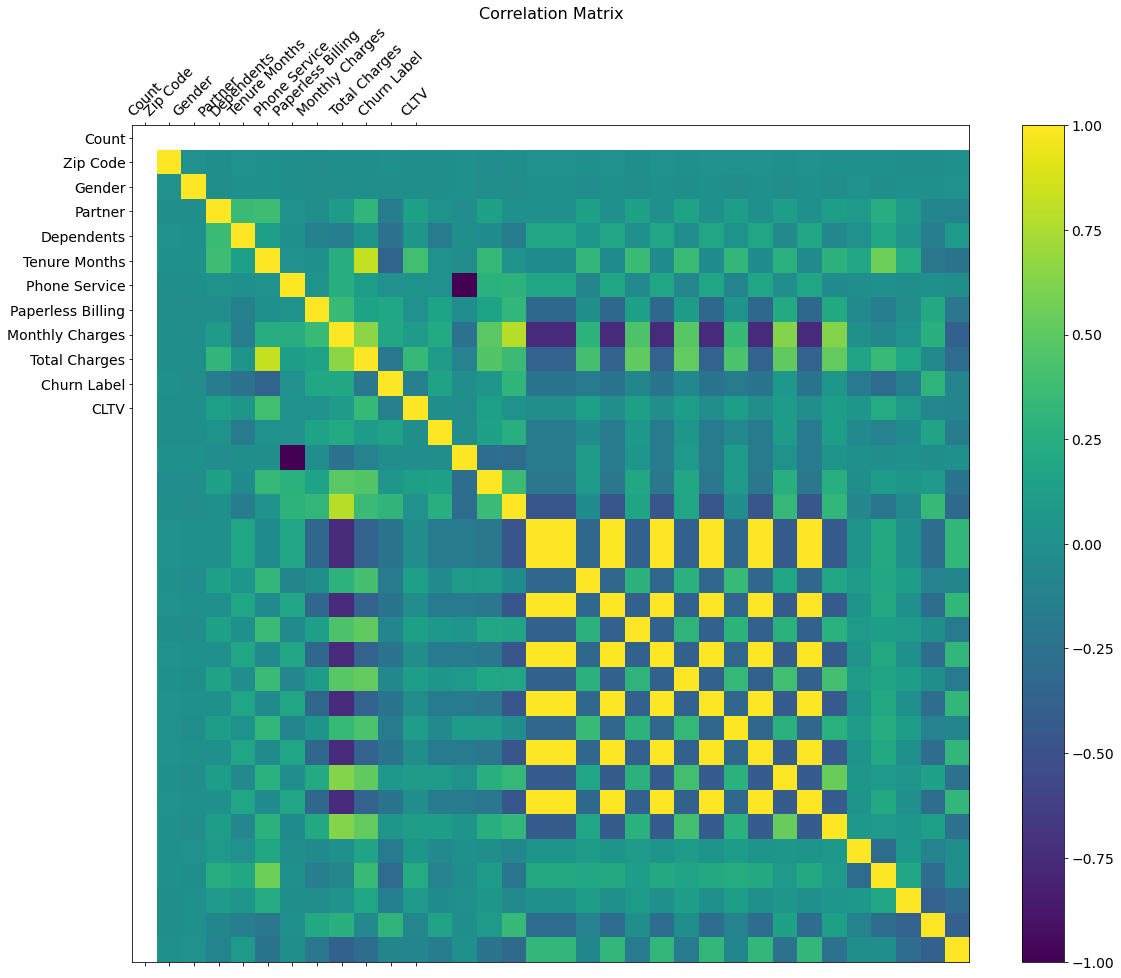

In [25]:
# Checking the correlation between features

# fig = px.imshow(corr,width=1000, height=1000)
# fig.show()

# corr = data_df.corr()
# corr.style.background_gradient(cmap='coolwarm')

f = plt.figure(figsize=(19, 15))
plt.matshow(data_df.corr(), fignum=f.number)
plt.xticks(range(data_df.select_dtypes(['number']).shape[1]), data_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_df.select_dtypes(['number']).shape[1]), data_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [26]:
# Create correlation matrix
corr_matrix = data_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
high_corr = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features
print("High Correlation Columns:")
for h in high_corr:
  print('\t', h, '\n')

High Correlation Columns:
	 Total Charges 

	 Multiple Lines_No phone service 

	 Internet Service_Fiber optic 

	 Internet Service_No 

	 Online Security_No internet service 

	 Online Backup_No internet service 

	 Device Protection_No internet service 

	 Tech Support_No internet service 

	 Streaming TV_No internet service 

	 Streaming Movies_No internet service 



> We can consider deleting one of pairs of columns that have high correlation. Having both of them would just be redundant and deleting all these redundant columns could help us model faster.

# Hypothesis Testing - Feature Significane

## General Linear Model - P Value

In [27]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name seperators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_").replace("/", "_or_").replace("'", "_") for column in data_df.columns]

#Effect the change to the dataframe column names
data_df.columns = all_columns




In [28]:
#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['CustomerID', 'Churn_Label']]
glm_columns = ' + '.join(map(str, glm_columns))

In [29]:
#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn_Label ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())
results_df = results_summary_to_dataframe(res)

/Users/gugank/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gugank/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gugank/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gugank/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/gugank/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning:

is_categorical_dtype is deprecated and will b

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Churn_Label   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7017
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.2
Date:                Wed, 22 May 2024   Deviance:                       5630.5
Time:                        11:09:06   Pearson chi2:                 7.19e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3008
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

> Judging by the P>|z| column, if the value is less than 0.05 (alpha value) then we can reject the null hypothesis and consider that the particular feature has a significant effect on Churn.

> These significant features can be seen in the following cell.

In [30]:
print(results_df[results_df['pvals'] < 0.05]['pvals'])

Multiple_Lines_Yes[T.True]                 3.019769e-02
Contract_One_year[T.True]                  1.723077e-10
Contract_Two_year[T.True]                  2.824538e-14
Payment_Method_Electronic_check[T.True]    1.989714e-03
Partner                                    3.767289e-04
Dependents                                 1.070393e-37
Tenure_Months                              6.821496e-22
Paperless_Billing                          1.019458e-05
Total_Charges                              1.473917e-05
Name: pvals, dtype: float64


## General Linear Model - Coefficients

In [31]:
print("Coefficients\n")
print(np.exp(res.params))
coeff_df = np.exp(res.params).to_frame().reset_index()

Coefficients

Intercept                                         1.344493
Senior_Citizen_Yes[T.True]                        1.099783
Multiple_Lines_No_phone_service[T.True]           1.211541
Multiple_Lines_Yes[T.True]                        1.479709
Internet_Service_Fiber_optic[T.True]              3.887771
Internet_Service_No[T.True]                       0.816820
Online_Security_No_internet_service[T.True]       0.816820
Online_Security_Yes[T.True]                       0.781745
Online_Backup_No_internet_service[T.True]         0.816820
Online_Backup_Yes[T.True]                         0.979628
Device_Protection_No_internet_service[T.True]     0.816820
Device_Protection_Yes[T.True]                     1.068818
Tech_Support_No_internet_service[T.True]          0.816820
Tech_Support_Yes[T.True]                          0.787514
Streaming_TV_No_internet_service[T.True]          0.816820
Streaming_TV_Yes[T.True]                          1.592230
Streaming_Movies_No_internet_service[T.Tru

> Coefficient values greater than 1 indicate the feature being a cause of higher churn.

> These values can be seeing in the following cell

In [32]:
print(coeff_df[coeff_df[0] > 1])

                                      index         0
0                                 Intercept  1.344493
1                Senior_Citizen_Yes[T.True]  1.099783
2   Multiple_Lines_No_phone_service[T.True]  1.211541
3                Multiple_Lines_Yes[T.True]  1.479709
4      Internet_Service_Fiber_optic[T.True]  3.887771
11            Device_Protection_Yes[T.True]  1.068818
15                 Streaming_TV_Yes[T.True]  1.592230
17             Streaming_Movies_Yes[T.True]  1.578461
21  Payment_Method_Electronic_check[T.True]  1.347068
23                                    Count  1.344493
24                                 Zip_Code  1.000001
26                                  Partner  1.310424
29                            Phone_Service  1.109738
30                        Paperless_Billing  1.397830
32                            Total_Charges  1.000308
33                                     CLTV  1.000018


> While we have a lot of insights from our feature selection process, before we start eliminating them, lets model it. We will apply a recursive feature eliminator after.

# Modelling

In [33]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split


In [34]:
def modeling(alg, alg_name, X_train, y_train, X_test, y_test, params={}, cm = False):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    if (cm == True):
      # Print confusion matrix
      cm = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix:")

      plt.figure(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
      plt.xlabel('Predicted Label')
      plt.ylabel('True Label')
      plt.title('Confusion Matrix Heatmap')
      plt.show()

    return model

## Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

data_df['Tenure_Months'] = sc.fit_transform(data_df[['Tenure_Months']])
data_df['Monthly_Charges'] = sc.fit_transform(data_df[['Monthly_Charges']])
data_df['Total_Charges'] = sc.fit_transform(data_df[['Total_Charges']])

## Recursive Feature Elimination - Logistic Regression

In [36]:
X = data_df.drop('Churn_Label', axis=1)
y = data_df['Churn_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [37]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression', X_train, y_train, X_test, y_test)

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6140350877192983
recall:  0.5283018867924528
f1_score:  0.7931277868422982


/Users/gugank/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [43]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and then applies logistic regression
log_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Define RFECV with modified parameters and specify importance_getter
rfecv = RFECV(
    estimator=log_pipeline,
    cv=StratifiedKFold(10, random_state=50, shuffle=True),
    scoring="accuracy",
    importance_getter='named_steps.logisticregression.coef_'  # Access the coef_ attribute
)

# Fit the RFECV model
rfecv.fit(X, y)



RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                ('logisticregression',
                                 LogisticRegression(max_iter=1000))]),
      importance_getter='named_steps.logisticregression.coef_',
      scoring='accuracy')

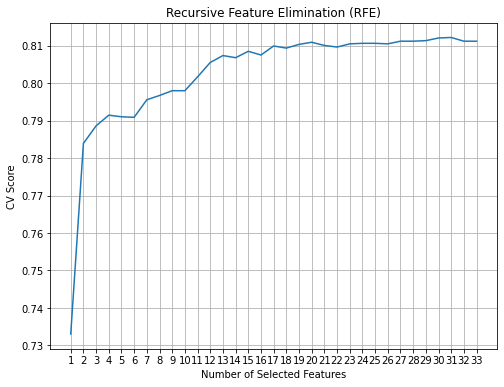

The optimal number of features: 31


In [44]:
import matplotlib.pyplot as plt

# Create a plot to visualize the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.grid()
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))


In [45]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (7043, 33)
"X" column list: ['Count', 'Zip_Code', 'Gender', 'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service', 'Paperless_Billing', 'Monthly_Charges', 'Total_Charges', 'CLTV', 'Senior_Citizen_Yes', 'Multiple_Lines_No_phone_service', 'Multiple_Lines_Yes', 'Internet_Service_Fiber_optic', 'Internet_Service_No', 'Online_Security_No_internet_service', 'Online_Security_Yes', 'Online_Backup_No_internet_service', 'Online_Backup_Yes', 'Device_Protection_No_internet_service', 'Device_Protection_Yes', 'Tech_Support_No_internet_service', 'Tech_Support_Yes', 'Streaming_TV_No_internet_service', 'Streaming_TV_Yes', 'Streaming_Movies_No_internet_service', 'Streaming_Movies_Yes', 'Contract_One_year', 'Contract_Two_year', 'Payment_Method_Credit_card__automatic_', 'Payment_Method_Electronic_check', 'Payment_Method_Mailed_check']
"X_rfe" dimension: (7043, 31)
"X_rfe" column list: ['Gender', 'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service', 'Paperless_Billing', 'Monthly_Char

## Train Test Split

In [46]:
# Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


4930
4930
2113
2113


## Logistic Regression

In [48]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', X_train, y_train, X_test, y_test)

Logistic Regression Classification
accuracy:  0.8163748225272125
precision:  0.6491596638655462
recall:  0.5830188679245283
f1_score:  0.8129862268160853


/Users/gugank/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Support Vector Classifier

In [49]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification', X_train, y_train, X_test, y_test)

SVC Classification
accuracy:  0.7491717936583058
precision:  0.0
recall:  0.0
f1_score:  0.6417418557148798


/Users/gugank/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



## Random Forest

In [50]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification", X_train, y_train, X_test, y_test)

Random Forest Classification
accuracy:  0.8045433033601515
precision:  0.6285714285714286
recall:  0.539622641509434
f1_score:  0.799363590845611


## Decision Trees

In [51]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification", X_train, y_train, X_test, y_test)

Decision Tree Classification
accuracy:  0.7321344060577378
precision:  0.46938775510204084
recall:  0.5207547169811321
f1_score:  0.7365832297484638


## Naive Bayes

In [52]:
#Naive bayes
nb_model = modeling(GaussianNB, "Naive Bayes Classification", X_train, y_train, X_test, y_test)

Naive Bayes Classification
accuracy:  0.6682442025556081
precision:  0.4217749313815188
recall:  0.869811320754717
f1_score:  0.6899077865762698


# Model Optimization - Hyperparameter Tuning

In [53]:
## Improve best model by hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_rfe, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/gugank/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gugank/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best Score: 0.8109689313346228
Best Hyperparameters: {'C': 0.453015894140465, 'penalty': 'l2', 'solver': 'newton-cg'}


In [54]:
params = result.best_params_
print(params)

{'C': 0.453015894140465, 'penalty': 'l2', 'solver': 'newton-cg'}


Logistic Regression Classification
accuracy:  0.8168480832938949
precision:  0.6486486486486487
recall:  0.5886792452830188
f1_score:  0.8138053981805934
Confusion Matrix:


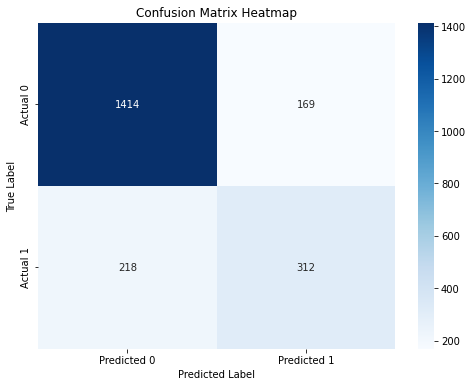

In [56]:
#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', X_train, y_train, X_test, y_test, params=params, cm=True)

## Saving Best Model

In [57]:
#Saving best model
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']

References:

This project was inspired by the efforts in https://github.com/codebrain001/customer-churn-prediction